# Import Libraries

In [59]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import dateutil

# Reading Data

In [60]:
# Read Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Read Transaction Data
df_saida = pd.read_csv('/content/drive/My Drive/TCC_FIA_IA/saida_items.csv', sep=';', parse_dates = ['DataSaida'], decimal =',', thousands = '.' )
df_saida.head(3)

,Cliente,Cidade,Vendedor,Codigo,Item,Tipo,SubTipo,ItensNovos,Fornecedor,QtdSaida,...,CFOP,DataSaida,ICMS,TipProdIPI,NSaiStatus,TipoNota,QTD_DIAS_FAT,Qtd_Dias_1,Qtd_Dias_2,Qtd_Dias_3
0,CRIZAN,JARINU,MARCOS PAULO,338028,BROCA MD D=2.8X33X61 H2.8,BROCA,FURAÇÃO,NaN,HEINZ TOOLS,4,...,5.405,2017-11-01,NaN,8,0,1,1.0,28.0,NaN,NaN
1,USINAGEM ESTRELA,JUNDIAÍ,MARCOS PAULO,4143970,VDS201A06800 WU25PD D=6.8 3XD SEM REFRI,BROCA,FURAÇÃO,NaN,KENNAMETAL,1,...,5.405,2017-11-01,NaN,8,0,1,1.0,28.0,NaN,NaN
2,USINAGEM ESTRELA,JUNDIAÍ,MARCOS PAULO,4143992,VDS201A08500 WU25PD D=8.5 3XD SEM REFRI,BROCA,FURAÇÃO,NaN,KENNAMETAL,1,...,5.405,2017-11-01,NaN,8,0,1,1.0,28.0,NaN,NaN


# Description Data Types and basic information

In [62]:
# The name of columns
df_saida.columns

Index(['Cliente', 'Cidade', 'Vendedor', 'Codigo', 'Item', 'Tipo', 'SubTipo',
       'ItensNovos', 'Fornecedor', 'QtdSaida', 'ValorSaida', 'ValorEntrada',
       'ValorVenda', 'ValorIcmsST', 'ValorIPI', 'TotalSemImpostos',
       'TotalComImpostos', 'NFSaida', 'CFOP', 'DataSaida', 'ICMS',
       'TipProdIPI', 'NSaiStatus', 'TipoNota', 'QTD_DIAS_FAT', 'Qtd_Dias_1',
       'Qtd_Dias_2', 'Qtd_Dias_3'],
      dtype='object')

In [63]:
# Data Types
df_saida.dtypes

Cliente                     object
Cidade                      object
Vendedor                    object
Codigo                      object
Item                        object
Tipo                        object
SubTipo                     object
ItensNovos                 float64
Fornecedor                  object
QtdSaida                     int64
ValorSaida                 float64
ValorEntrada               float64
ValorVenda                 float64
ValorIcmsST                  int64
ValorIPI                     int64
TotalSemImpostos           float64
TotalComImpostos           float64
NFSaida                      int64
CFOP                       float64
DataSaida           datetime64[ns]
ICMS                       float64
TipProdIPI                   int64
NSaiStatus                   int64
TipoNota                     int64
QTD_DIAS_FAT               float64
Qtd_Dias_1                 float64
Qtd_Dias_2                 float64
Qtd_Dias_3                 float64
dtype: object

In [64]:
# Number of rows and columns
df_saida.shape

(16732, 28)

In [65]:
df_saida.describe()

,ItensNovos,QtdSaida,ValorSaida,ValorEntrada,ValorVenda,ValorIcmsST,ValorIPI,TotalSemImpostos,TotalComImpostos,NFSaida,CFOP,ICMS,TipProdIPI,NSaiStatus,TipoNota,QTD_DIAS_FAT,Qtd_Dias_1,Qtd_Dias_2,Qtd_Dias_3
count,4.0,16732.000000,1.673200e+04,16732.000000,1.673200e+04,16732.0,16732.0,1.673200e+04,1.673200e+04,16732.000000,16732.000000,0.0,16732.000000,16732.0,16732.0,15354.000000,15354.000000,931.000000,0.0
mean,0.0,6.622281,3.382387e+04,147.181442,2.842288e+03,0.0,0.0,4.085462e+04,4.085462e+04,2955.385608,14.262706,NaN,5.735895,0.0,1.0,1.121271,29.882506,24.667025,NaN
std,0.0,12.710702,4.314678e+05,532.050787,1.262051e+05,0.0,0.0,4.751671e+05,4.751671e+05,1698.403303,235.808811,NaN,3.694831,0.0,0.0,0.477337,5.087408,7.183971,NaN
min,0.0,1.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,191.000000,5.102000,NaN,0.000000,0.0,1.0,1.000000,28.000000,15.000000,NaN
25%,0.0,1.000000,3.393000e+01,22.920000,8.121000e+01,0.0,0.0,1.188575e+02,1.188575e+02,1462.000000,5.102000,NaN,0.000000,0.0,1.0,1.000000,28.000000,15.000000,NaN
50%,0.0,2.000000,6.766000e+01,50.000000,1.730100e+02,0.0,0.0,2.684650e+02,2.684650e+02,2816.000000,5.102000,NaN,8.000000,0.0,1.0,1.000000,28.000000,30.000000,NaN
75%,0.0,10.000000,2.234000e+02,118.270000,4.197900e+02,0.0,0.0,5.973750e+02,5.973750e+02,4493.250000,5.102000,NaN,8.000000,0.0,1.0,1.000000,28.000000,30.000000,NaN
max,0.0,410.000000,3.088838e+07,10419.090000,1.134583e+07,0.0,0.0,3.088838e+07,3.088838e+07,5979.000000,6110.000000,NaN,10.000000,0.0,1.0,3.000000,60.000000,30.000000,NaN


In [66]:
# Add three columns -> year, month and day
df_saida = (

    df_saida
    .assign(ano = df_saida.DataSaida.dt.year)
    .assign(mes = df_saida.DataSaida.dt.month)
    .assign(dia = df_saida.DataSaida.dt.day)

)

# Explore Data Analysis

## Analyze Sales

In [67]:
# Dataset -> Sales per Year
df_venda_ano = (
    df_saida
    .assign(ano = df_saida.DataSaida.dt.year)
    .groupby('ano')
    .agg(venda = ('ValorVenda', 'sum'))
    .reset_index()
)

df_venda_ano

,ano,venda
0,2017,1251086.84
1,2018,38142778.01
2,2019,4070404.36
3,2020,1323904.83
4,2021,2599042.48
5,2022,169954.03


In [68]:
# First and last sale
print(f'A primeira venda foi em {df_saida.DataSaida.min()}')
print(f'A ultima venda foi em {df_saida.DataSaida.max()} ')

A primeira venda foi em 2017-11-01 00:00:00
A ultima venda foi em 2022-02-17 00:00:00 


In [69]:
# Analyzing the best year of sales
df_saida_mes = (
    df_saida
    .query('ano == 2018')
    .groupby('mes')
    .agg(venda = ('ValorVenda','sum'))
).reset_index()

In [70]:
# Function to name the month

def nomear_mes(x):
    if x == 1:
        return 'JAN'
    elif x == 2:
        return 'FEV'
    elif x == 3:
        return 'MAR'
    elif x == 4:
        return 'ABR'
    elif x == 5:
        return 'MAI'
    elif x == 6:
        return 'JUN'
    elif x == 7:
        return 'JUL'
    elif x == 8:
        return 'AGO'
    elif x == 9:
        return 'SET'
    elif x == 10:
        return 'OUT'
    elif x == 11:
        return 'NOV'
    else:
        return 'DEZ'

In [71]:
# Apply function
df_saida_mes['nome_mes'] = df_saida_mes['mes'].apply(nomear_mes)
df_saida_mes

,mes,venda,nome_mes
0,1,467596.09,JAN
1,2,1279843.02,FEV
2,3,2055628.41,MAR
3,4,748353.19,ABR
4,5,1898946.23,MAI
5,6,13217385.86,JUN
6,7,11661427.36,JUL
7,8,2512711.49,AGO
8,9,948245.45,SET
9,10,2037132.30,OUT


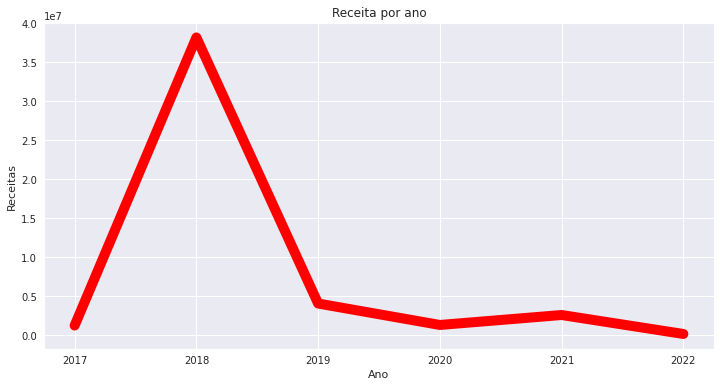

In [72]:
# Graph -> Sale per year
sns.set_style("darkgrid")
plt.subplots(figsize=(12, 6))
sns.lineplot(x = 'ano', 
             y = 'venda', 
             data = df_venda_ano,
             palette = 'plasma',
             linewidth = 10,
             color = 'red'
             )
#plt.legend(labels = ['Receita', 10], loc = 'best')
plt.xlabel("Ano")
plt.ylabel('Receitas')
#plt.ylim(0, 15000000)
plt.title('Receita por ano')
plt.show()

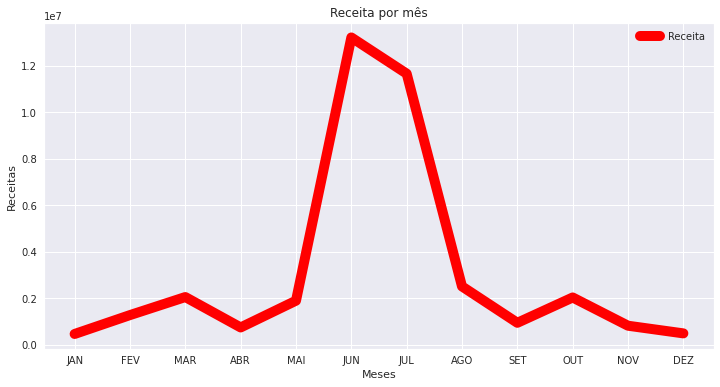

In [73]:
# Graph -> Sales curve for the best sales year
sns.set_style("darkgrid")
plt.subplots(figsize=(12, 6))
sns.lineplot(x = 'nome_mes', 
             y = 'venda', 
             data = df_saida_mes,
             palette = 'plasma',
             linewidth = 10,
             color = 'red'
             )
plt.legend(labels = ['Receita', 10], loc = 'best')
plt.xlabel("Meses")
plt.ylabel('Receitas')
#plt.ylim(0, 15000000)
plt.title('Receita por mês')
plt.show()

In [74]:
# Dataset -> Sales per year and month
df_saida_graph_mes_ano = (
    df_saida.groupby(['ano', 'mes'])
    .agg(Receita = ('ValorVenda','sum'))
    .reset_index()

)

df_saida_graph_mes_ano['nome_mes'] = df_saida_graph_mes_ano['mes'].apply(nomear_mes)

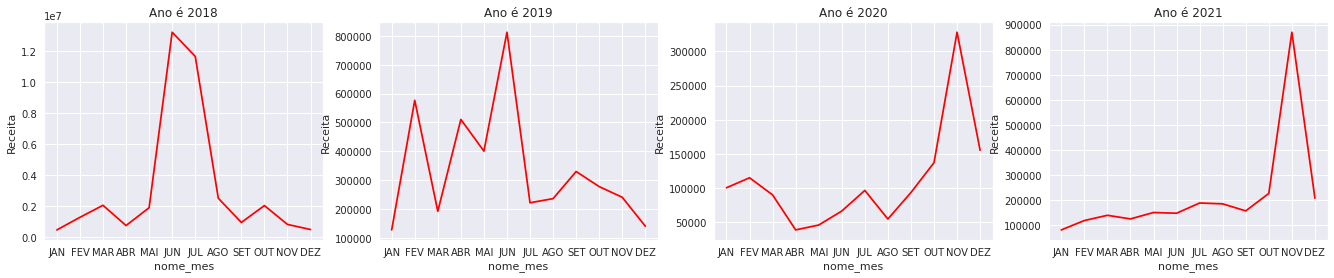

In [75]:
# GRAPH -> Sales per month since 2018 to 2021
fig, axes = plt.subplots(1, 4, figsize=(23, 4))
listinha_aux = [0, 1, 2, 3]
for i, j in zip(df_saida_graph_mes_ano.ano.unique().tolist()[1:5], listinha_aux):
    x = (df_saida_graph_mes_ano.query(f'ano == {i}')
        .assign(nome_mes = lambda j: j['mes'].apply(nomear_mes)))
    sns.lineplot(ax = axes[j] , x = 'nome_mes', y = 'Receita', data = x, color = 'red')
    axes[j].set_title(f"Ano é {i}")

## TOP and BOTTOM Sale per City

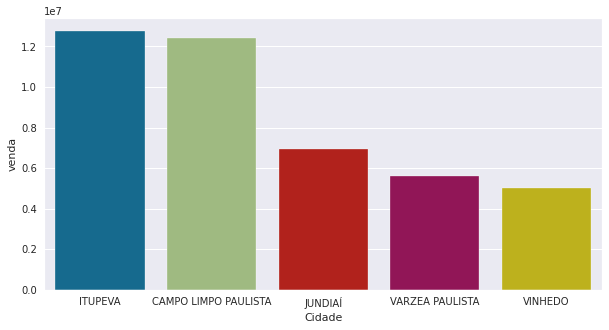

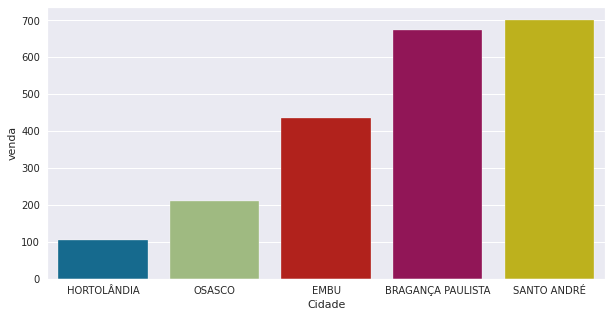

In [76]:
# GRAPH ->  Sale per City since 2017

df_hist_top = (
    df_saida
    .groupby('Cidade')
    .agg(venda = ('ValorVenda', 'sum'))
).sort_values('venda', ascending = False).reset_index().head(5)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'Cidade', y = 'venda', data = df_hist_top)

df_hist_bot = (
    df_saida
    .groupby('Cidade')
    .agg(venda = ('ValorVenda', 'sum'))
).sort_values('venda', ascending = True).reset_index().head(5)
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'Cidade', y = 'venda', data = df_hist_bot)

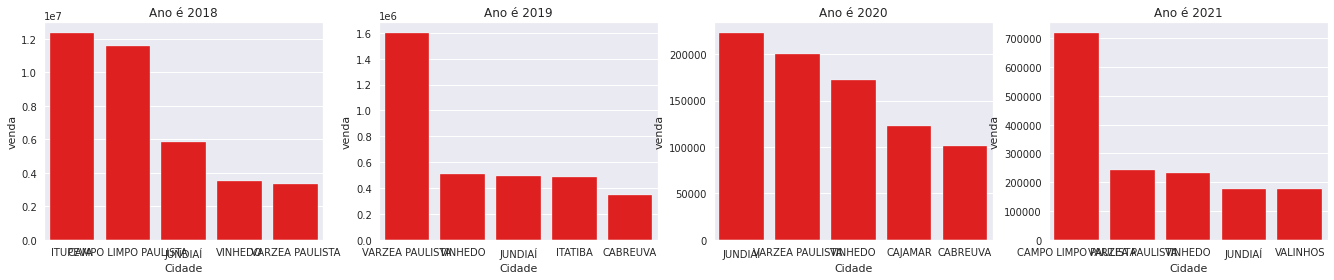

In [77]:
# GRAPH -> Sale per city since 2018 to 2021

venda_cidade_ano = (
    df_saida
    .filter(['ValorVenda', 'Cidade', 'ano'])
    .groupby(['Cidade', 'ano'])
    .agg(venda = ('ValorVenda','sum'))
    .reset_index()
)

fig, axes = plt.subplots(1, 4, figsize=(23, 4))
listinha_aux = [0, 1, 2, 3]
for i, j in zip(venda_cidade_ano.ano.unique().tolist()[1:5], listinha_aux):
    x = (venda_cidade_ano.query(f'ano == {i}')
         .sort_values(by = 'venda', ascending = False)).head(5)
    sns.barplot(ax = axes[j] , x = 'Cidade', y = 'venda', data = x, color = 'red')
    axes[j].set_title(f"Ano é {i}")

(0.0, 20000.0)

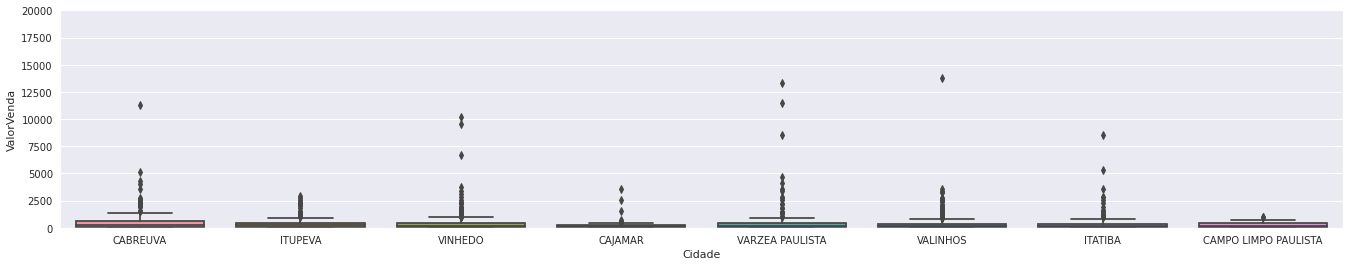

In [78]:
# GRAPH -> Boxplot sale per city
cidades = ('ITUPEVA', 'CAMPO LIMPO PAULISTA', 'VINHEDO', 'JUNDIAI', 'VARZEA PAULISTA', 'ITATIBA', 'CABREUVA', 'CAJAMAR', 'VALINHOS')
base_top_cidades = (
    df_saida
    .filter(['Cidade', 'ano', 'ValorVenda'])
    .query(f'Cidade in ({cidades})')
    .query('ano == 2021')
)

fig, axes = plt.subplots(1, 1, figsize=(23, 4))
sns.boxplot(x = 'Cidade', y = 'ValorVenda', data = base_top_cidades)
plt.ylim(0, 20000)

In [79]:
# Dataset -> AOV per City
tkt_medio_cidades = (
    df_saida
    .filter(['Cidade', 'ano', 'ValorVenda', 'QtdSaida', 'NFSaida'])
    .groupby('Cidade')
    .agg(venda = ('ValorVenda', 'sum'),
         qtd = ('NFSaida', 'nunique'))
    .reset_index()
    .assign(tkt = lambda x: x['venda']/x['qtd'])
    .sort_values(by = 'tkt', ascending = False)
).head(10)

tkt_medio_cidades

,Cidade,venda,qtd,tkt
6,CAMPO LIMPO PAULISTA,12399183.98,155,79994.735355
15,ITUPEVA,12765407.80,275,46419.664727
22,MAUÁ,36193.08,1,36193.080000
21,MANAUS,23710.04,1,23710.040000
29,SANTA GERTRUDES,16936.92,1,16936.920000
37,TABOÃO DE SERRA,42540.14,3,14180.046667
28,SANTA FÉ DO SUL,84306.28,7,12043.754286
13,INDAIATUBA,69136.78,6,11522.796667
36,SÃO PAULO,257096.98,26,9888.345385
11,FRANCO DA ROCHA,59029.40,7,8432.771429


In [80]:
# Dataset -> IPC per City
ipc_acumulado = (
    df_saida
    .filter(['Cidade', 'ano', 'ValorVenda', 'QtdSaida', 'NFSaida'])
    .groupby('Cidade')
    .agg(venda = ('QtdSaida', 'sum'),
         qtd = ('NFSaida', 'nunique'))
    .reset_index()
    .assign(ipc = lambda x: x['venda']/x['qtd'])
    .sort_values(by = 'ipc', ascending = False)
).head(5)

ipc_acumulado

,Cidade,venda,qtd,ipc
21,MANAUS,90,1,90.000000
35,SÃO CAETANO DO SUL,2537,46,55.152174
38,VALINHOS,14846,388,38.262887
36,SÃO PAULO,968,26,37.230769
19,LOUVEIRA,4706,135,34.859259


In [81]:
# Dataset -> Sale, AOV and IPC per City since 2021 to 2022
base_vendas_2021e2022 = (
    df_saida
    .filter(['Cidade', 'ano', 'ValorVenda', 'QtdSaida', 'NFSaida'])
    .query('ano >= 2021')
    .groupby(['Cidade'])
    .agg(venfin = ('ValorVenda', 'sum'),
         venfis = ('QtdSaida', 'sum'),
         cupom = ('NFSaida', 'nunique'))
    .assign(tkt = lambda x: x['venfin']/x['cupom'])
    .assign(ipc = lambda x: x['venfis']/x['cupom'])
    .reset_index()
)

base_vendas_2021e2022

,Cidade,venfin,venfis,cupom,tkt,ipc
0,ATIBAIA,52135.31,1012,18,2896.406111,56.222222
1,CABREUVA,138298.22,1428,112,1234.805536,12.750000
2,CAIEIRAS,29726.56,9,2,14863.280000,4.500000
3,CAJAMAR,129564.62,371,25,5182.584800,14.840000
4,CAMPINAS,15983.03,130,8,1997.878750,16.250000
5,CAMPO LIMPO PAULISTA,720384.17,221,24,30016.007083,9.208333
6,DIADEMA,1859.44,6,2,929.720000,3.000000
7,HORTOLÂNDIA,103.76,5,1,103.760000,5.000000
8,INDAIATUBA,55109.92,24,3,18369.973333,8.000000
9,ITATIBA,155733.09,1473,100,1557.330900,14.730000


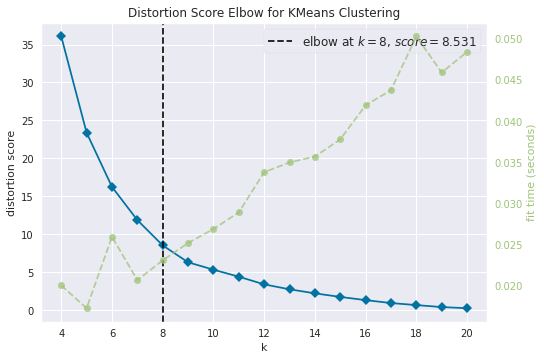

In [82]:
# Choose the correct number of clusters
X = base_vendas_2021e2022.filter(['venfin', 'venfis', 'cupom', 'tkt', 'ipc'])

# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(4, 21))
visualizer.fit(X)
visualizer.show();


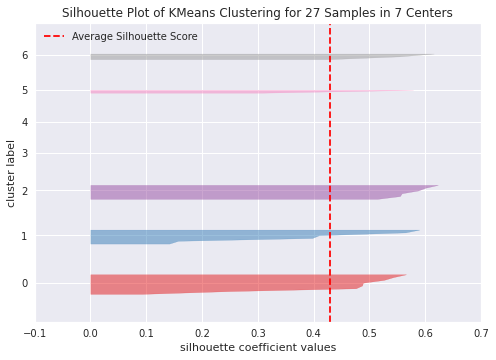

<Figure size 576x396 with 0 Axes>

In [83]:
# Choose the correct number of clusters
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=7, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)
visualizer.show();

plt.tight_layout()

In [84]:
# We can adopt 7 clusters, being the ideal for the analysis of performance grouping by city
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

In [85]:
# Dataset -> Cluster City per sale, amount, aov and ipc
base_vendas_2021e2022['cluster'] = pd.DataFrame(labels, columns = ['cluster'])
base_vendas_2021e2022

,Cidade,venfin,venfis,cupom,tkt,ipc,cluster
0,ATIBAIA,52135.31,1012,18,2896.406111,56.222222,6
1,CABREUVA,138298.22,1428,112,1234.805536,12.750000,2
2,CAIEIRAS,29726.56,9,2,14863.280000,4.500000,1
3,CAJAMAR,129564.62,371,25,5182.584800,14.840000,0
4,CAMPINAS,15983.03,130,8,1997.878750,16.250000,0
5,CAMPO LIMPO PAULISTA,720384.17,221,24,30016.007083,9.208333,4
6,DIADEMA,1859.44,6,2,929.720000,3.000000,0
7,HORTOLÂNDIA,103.76,5,1,103.760000,5.000000,0
8,INDAIATUBA,55109.92,24,3,18369.973333,8.000000,1
9,ITATIBA,155733.09,1473,100,1557.330900,14.730000,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


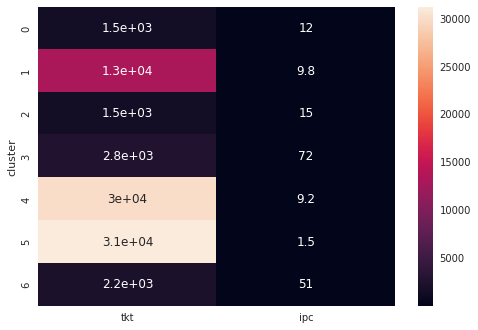

In [86]:
# GRAPH -> Cluster Heatmap, AOV and IPC
sns.heatmap(base_vendas_2021e2022.groupby(['cluster'])['tkt', 'ipc'].mean().round(2), annot = True)
plt.show()

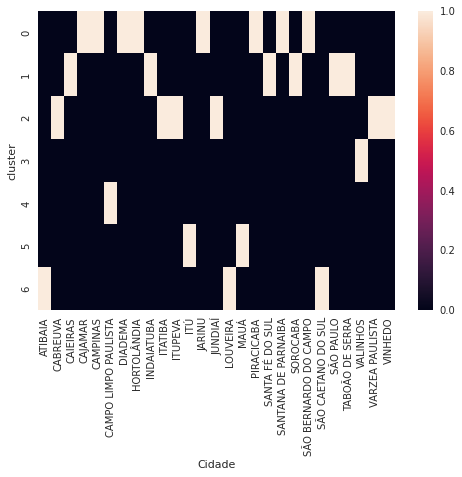

In [87]:
# GRAPH -> Heatmap Cluster and City
sns.heatmap(pd.crosstab(base_vendas_2021e2022.cluster, base_vendas_2021e2022.Cidade))

## Sale per Item Type

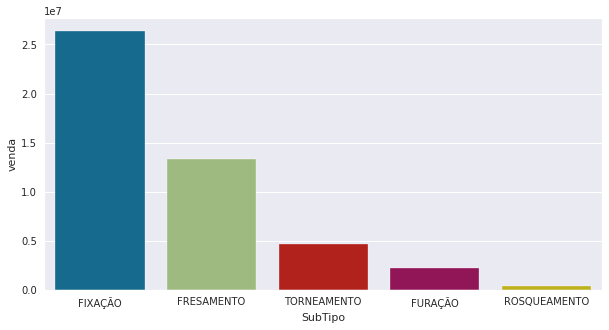

In [88]:
# DATASET and GRAPH -> TOP 5 sales per subtype
df_hist_item_top = (
    df_saida
    .groupby('SubTipo')
    .agg(venda = ('ValorVenda', 'sum'))
).sort_values('venda', ascending = False).reset_index().head(5)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'SubTipo', y = 'venda', data = df_hist_item_top)

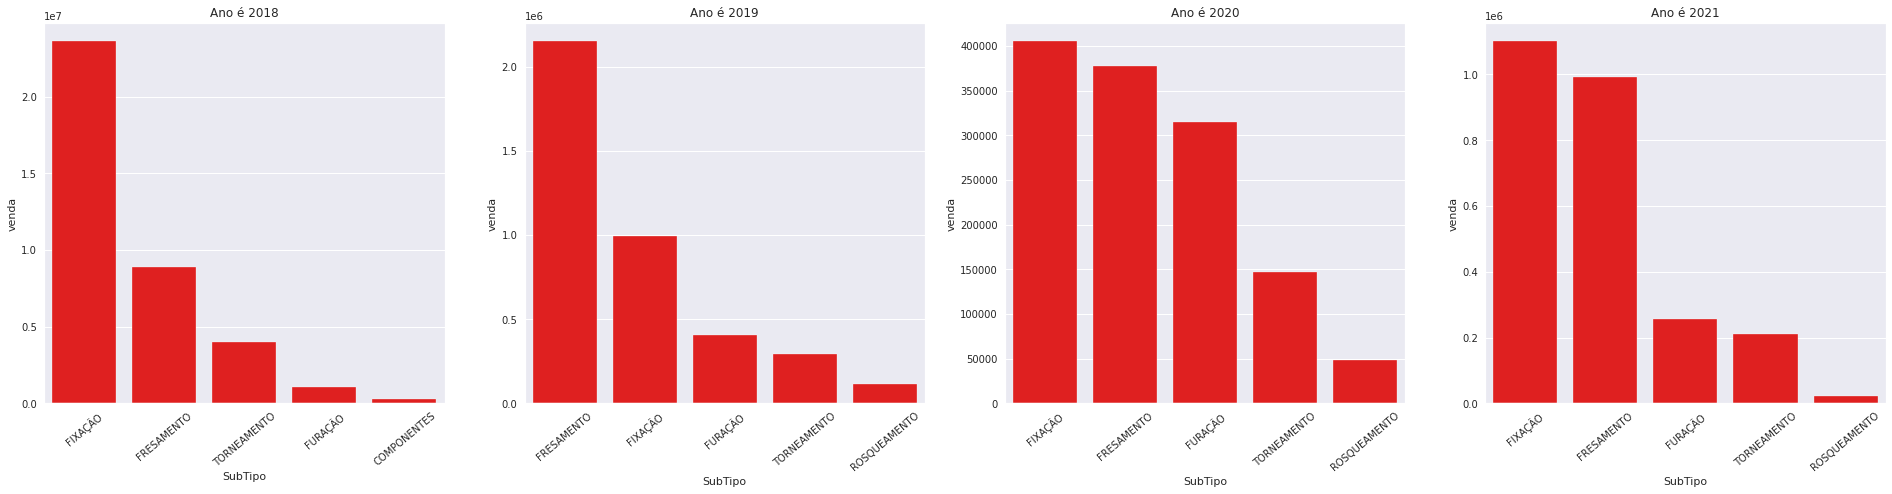

In [89]:
# DATASET and GRAPH -> TOP 5 sales per subtype per year
df_hist_item_top_ano = (
    df_saida
    .groupby(['SubTipo', 'ano'])
    .agg(venda = ('ValorVenda', 'sum'))
).sort_values('venda', ascending = False).reset_index()
lista_ano = [2018, 2019, 2020, 2021]
fig, axes = plt.subplots(1, 4, figsize=(33,7))
listinha_aux = [0, 1, 2, 3]
for i, j in zip(lista_ano, listinha_aux):
    x = (df_hist_item_top_ano.query(f'ano == {i}')
        .sort_values(by = ['venda'], ascending = False)
    ).head(5)
    sns.barplot(ax = axes[j] , x = 'SubTipo', y = 'venda', data = x, color = 'red')
    axes[j].set_title(f"Ano é {i}")
    axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=40)

(0.0, 20000.0)

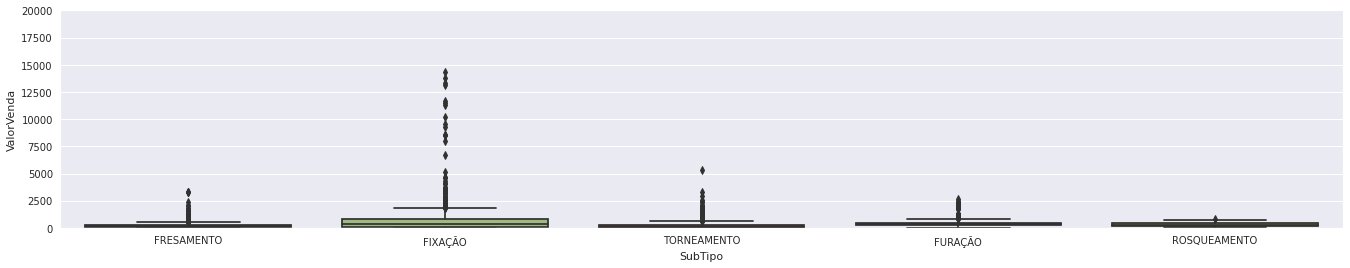

In [90]:
# GRAPH -> Boxplot per subtype

subtipo = ('FIXAÇÃO', 'FRESAMENTO', 'FURAÇÃO', 'TORNEAMENTO', 'ROSQUEAMENTO')
base_top_subtipo = (
    df_saida
    .filter(['SubTipo', 'ano', 'ValorVenda'])
    .query(f'SubTipo in ({subtipo})')
    .query('ano == 2021')
)

fig, axes = plt.subplots(1, 1, figsize=(23, 4))
sns.boxplot(x = 'SubTipo', y = 'ValorVenda', data = base_top_subtipo)
plt.ylim(0, 20000)

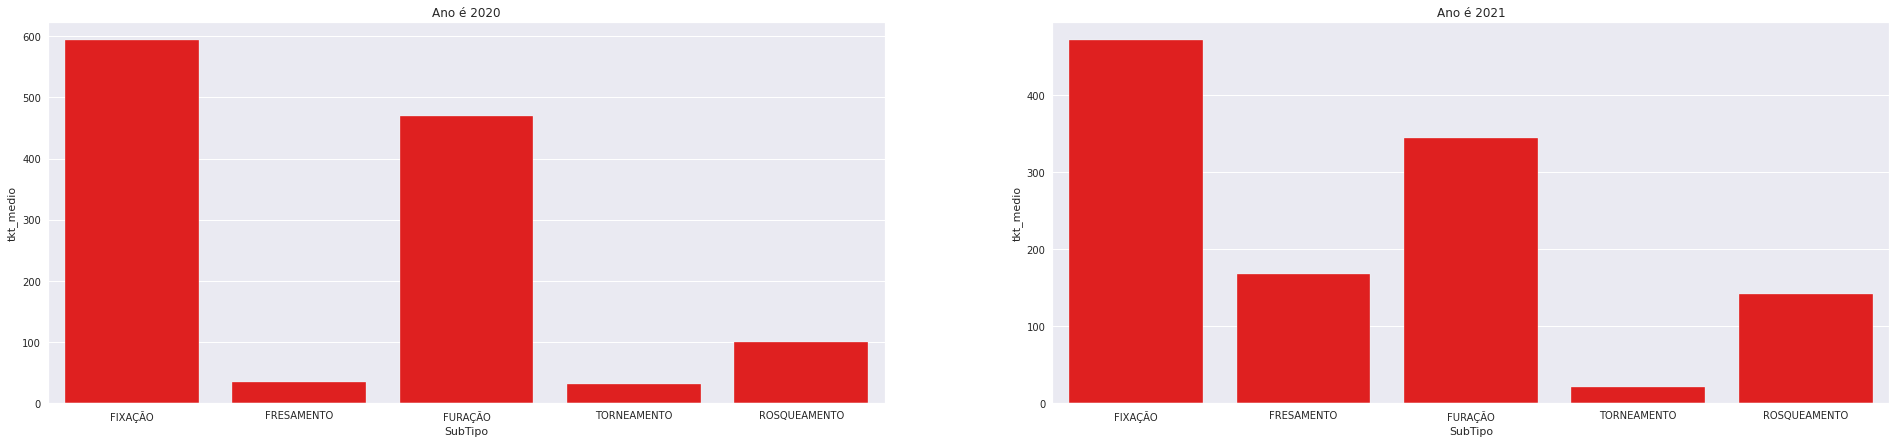

In [91]:
# GRAPH ->  AoV and IpC , top 5 per subtype

df_hist_tkt_medio_pecas = (
    df_saida
    .assign(nome_mes = lambda x: x['mes'].apply(nomear_mes))
    .groupby(['ano', 'SubTipo'])
    .agg(venda = ('ValorVenda', 'sum'),
         qtd = ('QtdSaida', 'sum')
    )
    .assign(tkt_medio = lambda x: x['venda']/x['qtd'])
).sort_values('venda', ascending = False).reset_index()

lista_ano = [2020, 2021]
fig, axes = plt.subplots(1, 2, figsize=(33,7))
listinha_aux = [0, 1]
for i, j in zip(lista_ano, listinha_aux):
    x = (df_hist_tkt_medio_pecas.query(f'ano == {i}')).head()
    sns.barplot(ax = axes[j] , x = 'SubTipo', y = 'tkt_medio', data = x, color = 'red')
    axes[j].set_title(f"Ano é {i}")
    axes[j].set_xticklabels(axes[j].get_xticklabels())

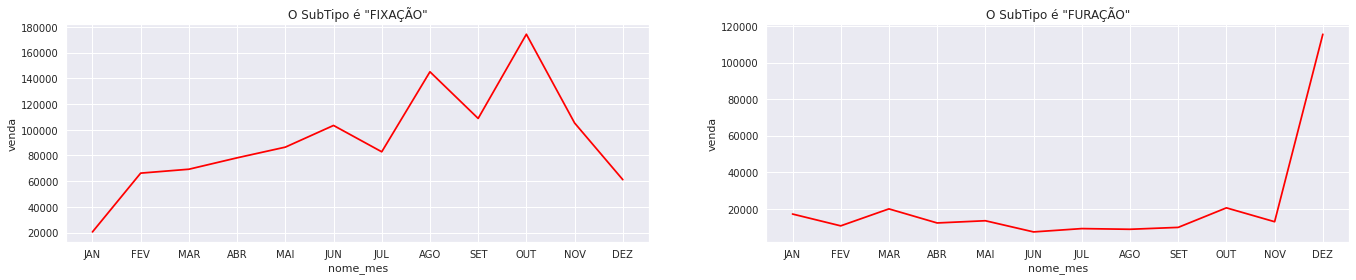

In [92]:
# GRAPH -> Analyze the fastening and drilling subtype

fix_fur_curva = (
    df_saida
    .filter(['ano', 'mes', 'SubTipo', 'ValorVenda'])
    .query('ano == 2021')
    .query(f'SubTipo in ("FIXAÇÃO", "FURAÇÃO")')
    .assign(nome_mes = lambda x:x['mes'].apply(nomear_mes))
    .groupby(['SubTipo', 'nome_mes', 'mes'])
    .agg(venda = ('ValorVenda', 'sum'))
    .reset_index()
    .sort_values(by = 'mes')
)

lista_subtipo = ["FIXAÇÃO", 'FURAÇÃO']
fig, axes = plt.subplots(1, 2, figsize=(23, 4))
listinha_aux = [0, 1]

for i, j in zip(lista_subtipo, listinha_aux):
    x = (fix_fur_curva.query(f'SubTipo == "{i}"'))
    sns.lineplot(ax = axes[j] , x = 'nome_mes', y = 'venda', data = x, color = 'red')
    axes[j].set_title(f'O SubTipo é "{i}"')









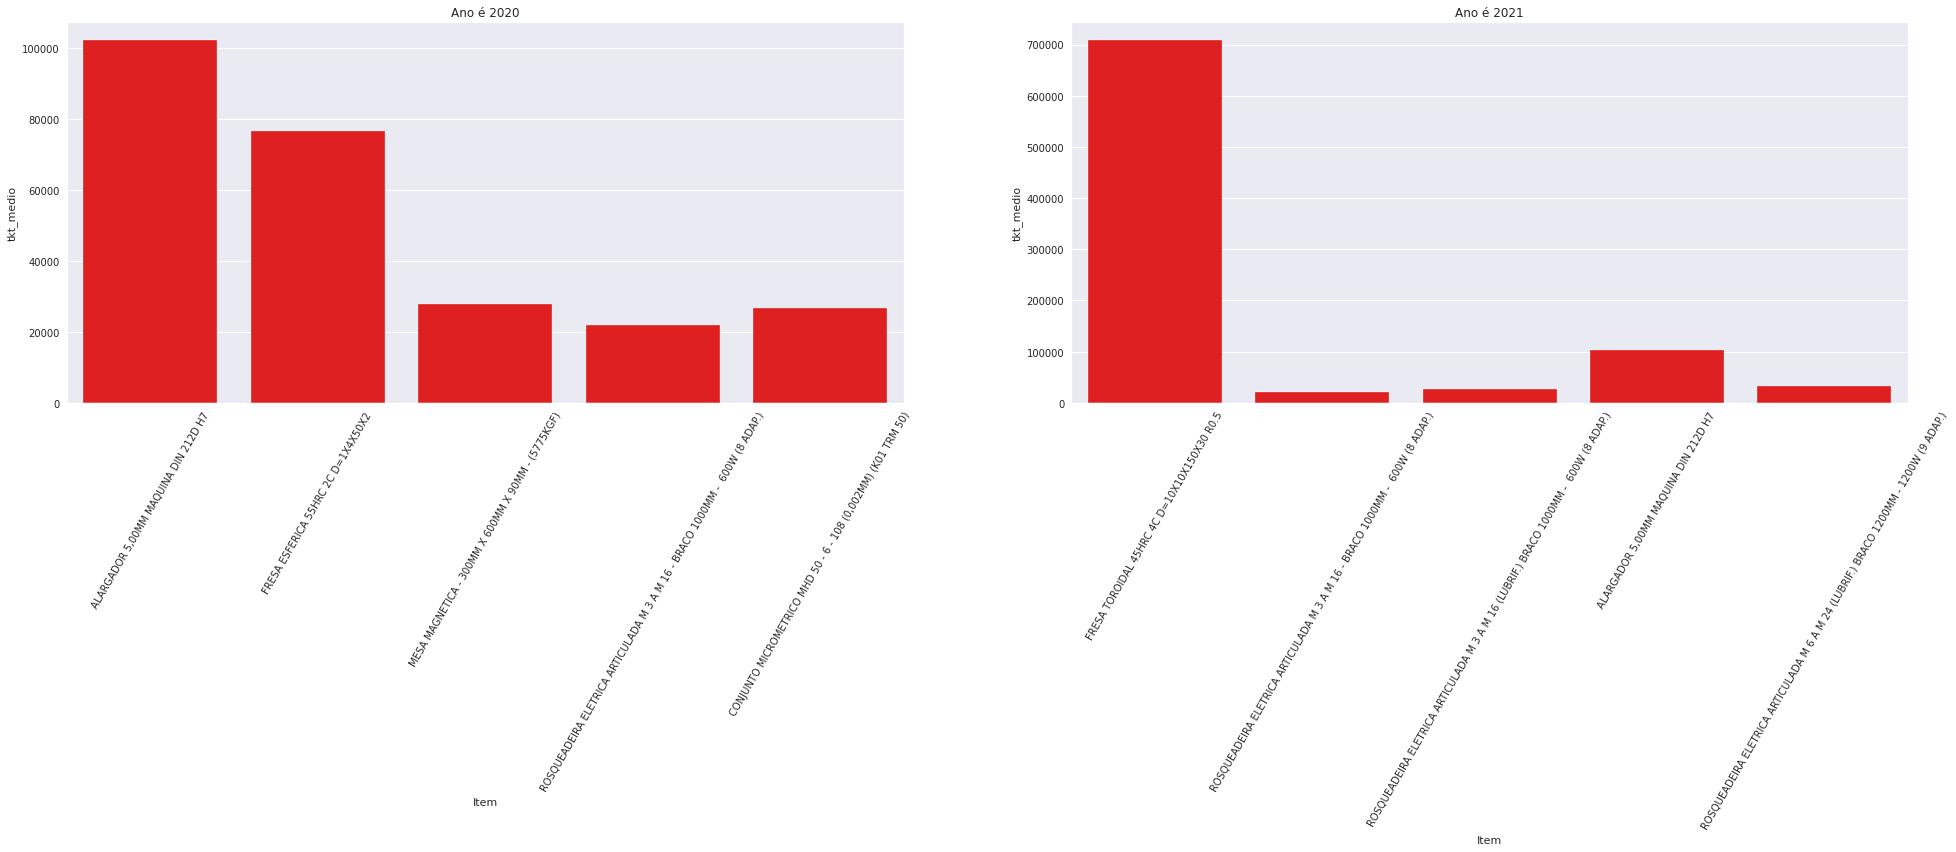

In [93]:
# Open by item with the highest average tkt and suggest selling them in cities they have always bought over the years
df_item_ano = (
    df_saida
 .filter(['Item', 'Tipo', 'SubTipo', 'QtdSaida', 'ValorVenda', 'ano', 'mes'])
 .groupby(['Item', 'Tipo', 'SubTipo', 'ano'])
 .agg(venda = ('ValorVenda', 'sum'), qtd = ('QtdSaida', 'sum'))
 .assign(tkt_medio = lambda x: x['venda']/x['qtd'])
 
 
 
 ).reset_index().sort_values(by = 'venda', ascending = False)

lista_ano = [2020, 2021]
fig, axes = plt.subplots(1, 2, figsize=(33,7))
listinha_aux = [0, 1]
for i, j in zip(lista_ano, listinha_aux):
    x = (df_item_ano.query(f'ano == {i}')).head()
    sns.barplot(ax = axes[j] , x = 'Item', y = 'tkt_medio', data = x, color = 'red')
    axes[j].set_title(f"Ano é {i}")
    axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation = 60)

## Shopping Basket

In [94]:
# Use the apriori algorithm to see which products are purchased together (shopping basket)
df_saida.columns

Index(['Cliente', 'Cidade', 'Vendedor', 'Codigo', 'Item', 'Tipo', 'SubTipo',
       'ItensNovos', 'Fornecedor', 'QtdSaida', 'ValorSaida', 'ValorEntrada',
       'ValorVenda', 'ValorIcmsST', 'ValorIPI', 'TotalSemImpostos',
       'TotalComImpostos', 'NFSaida', 'CFOP', 'DataSaida', 'ICMS',
       'TipProdIPI', 'NSaiStatus', 'TipoNota', 'QTD_DIAS_FAT', 'Qtd_Dias_1',
       'Qtd_Dias_2', 'Qtd_Dias_3', 'ano', 'mes', 'dia'],
      dtype='object')

In [95]:
df_apriori = (
    df_saida
    .groupby(['NFSaida', 'Item'])['Item'].count().reset_index(name = 'Count')
).sort_values(by = 'Count', ascending = False)

df_apriori

,NFSaida,Item,Count
14123,5122,QTD1604-S-T-GH4115,4
13120,4752,TNMX160408-WMV-GP1105,3
8350,2816,HNPJ0704ANSNGD WP40PM,3
8353,2816,XNPU100408SRMM WP40PM,3
14258,5174,CNMG120412-QM-GP1120,2
...,...,...,...
5562,1891,TNMX160404-R PA120,1
5563,1891,"VTSFT-TC6510 WP49EG M4X0,7 DIN371 6H C FURO CEGO",1
5564,1891,"VTSFT-TC6511 WP49EG M5X0,8 DIN371 6H C FURO CEGO",1
5565,1891,VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEGO,1


In [96]:
df_pt = df_apriori.pivot_table(index='NFSaida', columns='Item', values='Count', aggfunc='sum').fillna(0)
df_pt.head(4)

Item,-,024111-000040 K10F-DIA ESF 2C 20° D=4X6X20X65X4,024111-000060 K10F-DIA ESF 2C 20° D=6X6X80X6,024111-000080 K10F-DIA ESF 2C 20° D=8X8X44X80X8,11ER020M D=2,11ER025M D=2.5,11ER030M D=3,11ER040M D=4,11ER050M D=5,11ER060M D=6,...,XNPU15T616SRMM WP25PM,XNPU15T616SRMM WP40PM,XOMT09T30636 TN6030,XOMT12T30834 TN6030,XOMT12T30836 TN6030,XOMT16050834 TN6030,XOMT16050836 TN6030,XPPT070308ERMM WP25PM,XPPT070308ERMM WS40PM,XPPW070310SRMH WP40PM
NFSaida,,,,,,,,,,,,,,,,,,,,,
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
df_pt.shape

(5491, 3527)

In [98]:
# Convert the total purchases of each order into binary
def zerar(x):
  if x<=0:
    return 0
  else:
    return 1

In [99]:
# Apply to all values ​​with map function
df_model_apriori = df_pt.applymap(zerar)
df_model_apriori.head(5)

Item,-,024111-000040 K10F-DIA ESF 2C 20° D=4X6X20X65X4,024111-000060 K10F-DIA ESF 2C 20° D=6X6X80X6,024111-000080 K10F-DIA ESF 2C 20° D=8X8X44X80X8,11ER020M D=2,11ER025M D=2.5,11ER030M D=3,11ER040M D=4,11ER050M D=5,11ER060M D=6,...,XNPU15T616SRMM WP25PM,XNPU15T616SRMM WP40PM,XOMT09T30636 TN6030,XOMT12T30834 TN6030,XOMT12T30836 TN6030,XOMT16050834 TN6030,XOMT16050836 TN6030,XPPT070308ERMM WP25PM,XPPT070308ERMM WS40PM,XPPW070310SRMH WP40PM
NFSaida,,,,,,,,,,,,,,,,,,,,,
191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# Use the Apriori algorithm, using a rate of 0.5%, that is, of the total transactions, at 0.5% this item will appear

from mlxtend.frequent_patterns import association_rules, apriori
freq_item = apriori(df_model_apriori, min_support=0.005, use_colnames=True)
freq_item.sort_values(by = 'support', ascending = True)

# Aqui eu tenho o suporte -> % que apareceu o produto olhando todas as transações


,support,itemsets
0,0.005099,"(193.492 PARAFUSO M4 - HN07/09, BD07, RN12 , X..."
101,0.005099,"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ..."
99,0.005099,"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ..."
59,0.005099,(VDS202A08500 WU25PD D=8.5 5XD SEM REFRI)
48,0.005099,(SDMT1204PDRMH PA120)
...,...,...
79,0.022582,(XNPU15T608SRMM WP40PM)
17,0.023311,"(BDMT11T308ER-ML TN6405 R0,8)"
45,0.024768,(PINO FIXACAO BT 40 - 45G - SEM REFRIGERACAO I...
28,0.026953,(HNPJ0704ANSNGD WP40PM)


In [101]:
regra = association_rules(freq_item, metric='lift', min_threshold=1)
regra.sort_values('support', ascending=False, inplace = True)
regra

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ...",(VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEGO),0.019486,0.021490,0.012384,0.635514,29.572945,0.011965,2.684631
25,(VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEGO),"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ...",0.021490,0.019486,0.012384,0.576271,29.572945,0.011965,2.314012
13,(PINO FIXACAO BT 40 - 45G - SEM REFRIGERACAO I...,"(PORTA PINCA BT 40 X ER-40 (L1=70,00MM) - 12.0...",0.024768,0.016755,0.010199,0.411765,24.576087,0.009784,1.671517
12,"(PORTA PINCA BT 40 X ER-40 (L1=70,00MM) - 12.0...",(PINO FIXACAO BT 40 - 45G - SEM REFRIGERACAO I...,0.016755,0.024768,0.010199,0.608696,24.576087,0.009784,2.492260
11,(XDMT090308-HX PA120),(M680D025Z03H24L150 XDMT0903),0.044254,0.012748,0.009834,0.222222,17.431746,0.009270,1.269324
...,...,...,...,...,...,...,...,...,...
54,(VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEGO),"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ...",0.021490,0.006374,0.005099,0.237288,37.227119,0.004962,1.302754
53,"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ...",(VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEG...,0.019486,0.005828,0.005099,0.261682,44.903037,0.004986,1.346537
52,(VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEG...,"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ...",0.005828,0.019486,0.005099,0.875000,44.903037,0.004986,7.844109
51,"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ...",(VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEGO),0.006374,0.021490,0.005099,0.800000,37.227119,0.004962,4.892551


In [102]:
#regra
deparaitem = (
    df_saida
    .filter(['Item', 'SubTipo'])
    .drop_duplicates()
)


x = []
for i in range(0, regra.antecedents.count()):
    x.append(list(regra.antecedents[i])[0])


y = []
for i in range(0, regra.consequents.count()):
    y.append(list(regra.consequents[i])[0])
regra['nome_antecedente'] = np.array(x)
regra['nome_apos'] = np.array(y)


regra = regra.merge(deparaitem, how = 'left', left_on = 'nome_antecedente', right_on = 'Item').rename(columns = {'SubTipo':'SubTipo_Antes'})
regra = regra.merge(deparaitem, how = 'left', left_on = 'nome_apos', right_on = 'Item').rename(columns = {'SubTipo':'SubTipo_Depois'})
regra

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,nome_antecedente,nome_apos,Item_x,SubTipo_Antes,Item_y,SubTipo_Depois
0,"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ...",(VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEGO),0.019486,0.021490,0.012384,0.635514,29.572945,0.011965,2.684631,40040600T016 RETA 4C 30° D=6X6X50X16,40040800T020 RETA 4C 30° D=8X8X50X20,40040600T016 RETA 4C 30° D=6X6X50X16,FRESAMENTO,40040800T020 RETA 4C 30° D=8X8X50X20,FRESAMENTO
1,(VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEGO),"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ...",0.021490,0.019486,0.012384,0.576271,29.572945,0.011965,2.314012,40040800T020 RETA 4C 30° D=8X8X50X20,40040600T016 RETA 4C 30° D=6X6X50X16,40040800T020 RETA 4C 30° D=8X8X50X20,FRESAMENTO,40040600T016 RETA 4C 30° D=6X6X50X16,FRESAMENTO
2,(PINO FIXACAO BT 40 - 45G - SEM REFRIGERACAO I...,"(PORTA PINCA BT 40 X ER-40 (L1=70,00MM) - 12.0...",0.024768,0.016755,0.010199,0.411765,24.576087,0.009784,1.671517,40040800T020 RETA 4C 30° D=8X8X50X20,40041000T022 RETA 4C 30° D=10X10X72X22,40040800T020 RETA 4C 30° D=8X8X50X20,FRESAMENTO,40041000T022 RETA 4C 30° D=10X10X72X22,FRESAMENTO
3,"(PORTA PINCA BT 40 X ER-40 (L1=70,00MM) - 12.0...",(PINO FIXACAO BT 40 - 45G - SEM REFRIGERACAO I...,0.016755,0.024768,0.010199,0.608696,24.576087,0.009784,2.492260,40041000T022 RETA 4C 30° D=10X10X72X22,40040800T020 RETA 4C 30° D=8X8X50X20,40041000T022 RETA 4C 30° D=10X10X72X22,FRESAMENTO,40040800T020 RETA 4C 30° D=8X8X50X20,FRESAMENTO
4,(XDMT090308-HX PA120),(M680D025Z03H24L150 XDMT0903),0.044254,0.012748,0.009834,0.222222,17.431746,0.009270,1.269324,"BDMT11T316ER-ML TN6405 R1,6","BDMT11T308ER-ML TN6405 R0,8","BDMT11T316ER-ML TN6405 R1,6",FRESAMENTO,"BDMT11T308ER-ML TN6405 R0,8",FRESAMENTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,(VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEGO),"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ...",0.021490,0.006374,0.005099,0.237288,37.227119,0.004962,1.302754,"VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO CEGO","VTSFT-TC6550 WP49EG M10X1,5 DIN371 6H C FURO CEGO","VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO CEGO",ROSQUEAMENTO,"VTSFT-TC6550 WP49EG M10X1,5 DIN371 6H C FURO CEGO",ROSQUEAMENTO
64,"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ...",(VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEG...,0.019486,0.005828,0.005099,0.261682,44.903037,0.004986,1.346537,"VTSFT-TC6550 WP49EG M10X1,5 DIN371 6H C FURO CEGO","VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO CEGO","VTSFT-TC6550 WP49EG M10X1,5 DIN371 6H C FURO CEGO",ROSQUEAMENTO,"VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO CEGO",ROSQUEAMENTO
65,(VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEG...,"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ...",0.005828,0.019486,0.005099,0.875000,44.903037,0.004986,7.844109,"VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO CEGO","VTSFT-TC6550 WP49EG M10X1,5 DIN371 6H C FURO CEGO","VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO CEGO",ROSQUEAMENTO,"VTSFT-TC6550 WP49EG M10X1,5 DIN371 6H C FURO CEGO",ROSQUEAMENTO
66,"(VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO ...",(VTSFT-TC6514 WP49EG M6X1 DIN371 6H C FURO CEGO),0.006374,0.021490,0.005099,0.800000,37.227119,0.004962,4.892551,"VTSFT-TC6550 WP49EG M10X1,5 DIN371 6H C FURO CEGO","VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO CEGO","VTSFT-TC6550 WP49EG M10X1,5 DIN371 6H C FURO CEGO",ROSQUEAMENTO,"VTSFT-TC6518 WP49EG M8X1,25 DIN371 6H C FURO CEGO",ROSQUEAMENTO


## Analyze Invetory

In [103]:
# Analyze Inventory
df_estoque = pd.read_csv('/content/drive/MyDrive/TCC_FIA_IA/estoque/base_estoque.csv', sep = ',', parse_dates = ['data'])
df_estoque.drop('Unnamed: 0', inplace = True, axis = 1)
df_estoque.head(3)

# Cross-check the DEPARA Type and SubType base, and analyze the available stock per month.
# Graph the curve of the stock by month, see if it matches the peak of Sales.
# See the balance available at the end of the month.

,cod_original,produto,preco_entrada,disponivel,total,data
0,6568512.0,024111-000040 K10F-DIA ESF 2C 20° D=4X6X20X65X4,250.45,12.0,3005.40,2020-04-01
1,2333103.0,024111-000060 K10F-DIA ESF 2C 20° D=6X6X80X6,183.39,14.0,2567.46,2020-04-01
2,6568514.0,024111-000080 K10F-DIA ESF 2C 20° D=8X8X44X80X8,325.16,4.0,1300.64,2020-04-01


In [104]:
df_estoque_trat = (
    df_estoque
 .merge(deparaitem, how = 'left', left_on = 'produto', right_on = 'Item')
 .assign(mes = df_estoque.data.dt.month)
 .assign(ano = df_estoque.data.dt.year)
 .assign(nome_mes = lambda x:x['mes'].apply(nomear_mes))
 
 
 )
df_estoque_trat.head(3)

,cod_original,produto,preco_entrada,disponivel,total,data,Item,SubTipo,mes,ano,nome_mes
0,6568512.0,024111-000040 K10F-DIA ESF 2C 20° D=4X6X20X65X4,250.45,12.0,3005.40,2020-04-01,024111-000040 K10F-DIA ESF 2C 20° D=4X6X20X65X4,FRESAMENTO,4,2020,ABR
1,2333103.0,024111-000060 K10F-DIA ESF 2C 20° D=6X6X80X6,183.39,14.0,2567.46,2020-04-01,024111-000060 K10F-DIA ESF 2C 20° D=6X6X80X6,FRESAMENTO,4,2020,ABR
2,6568514.0,024111-000080 K10F-DIA ESF 2C 20° D=8X8X44X80X8,325.16,4.0,1300.64,2020-04-01,024111-000080 K10F-DIA ESF 2C 20° D=8X8X44X80X8,FRESAMENTO,4,2020,ABR


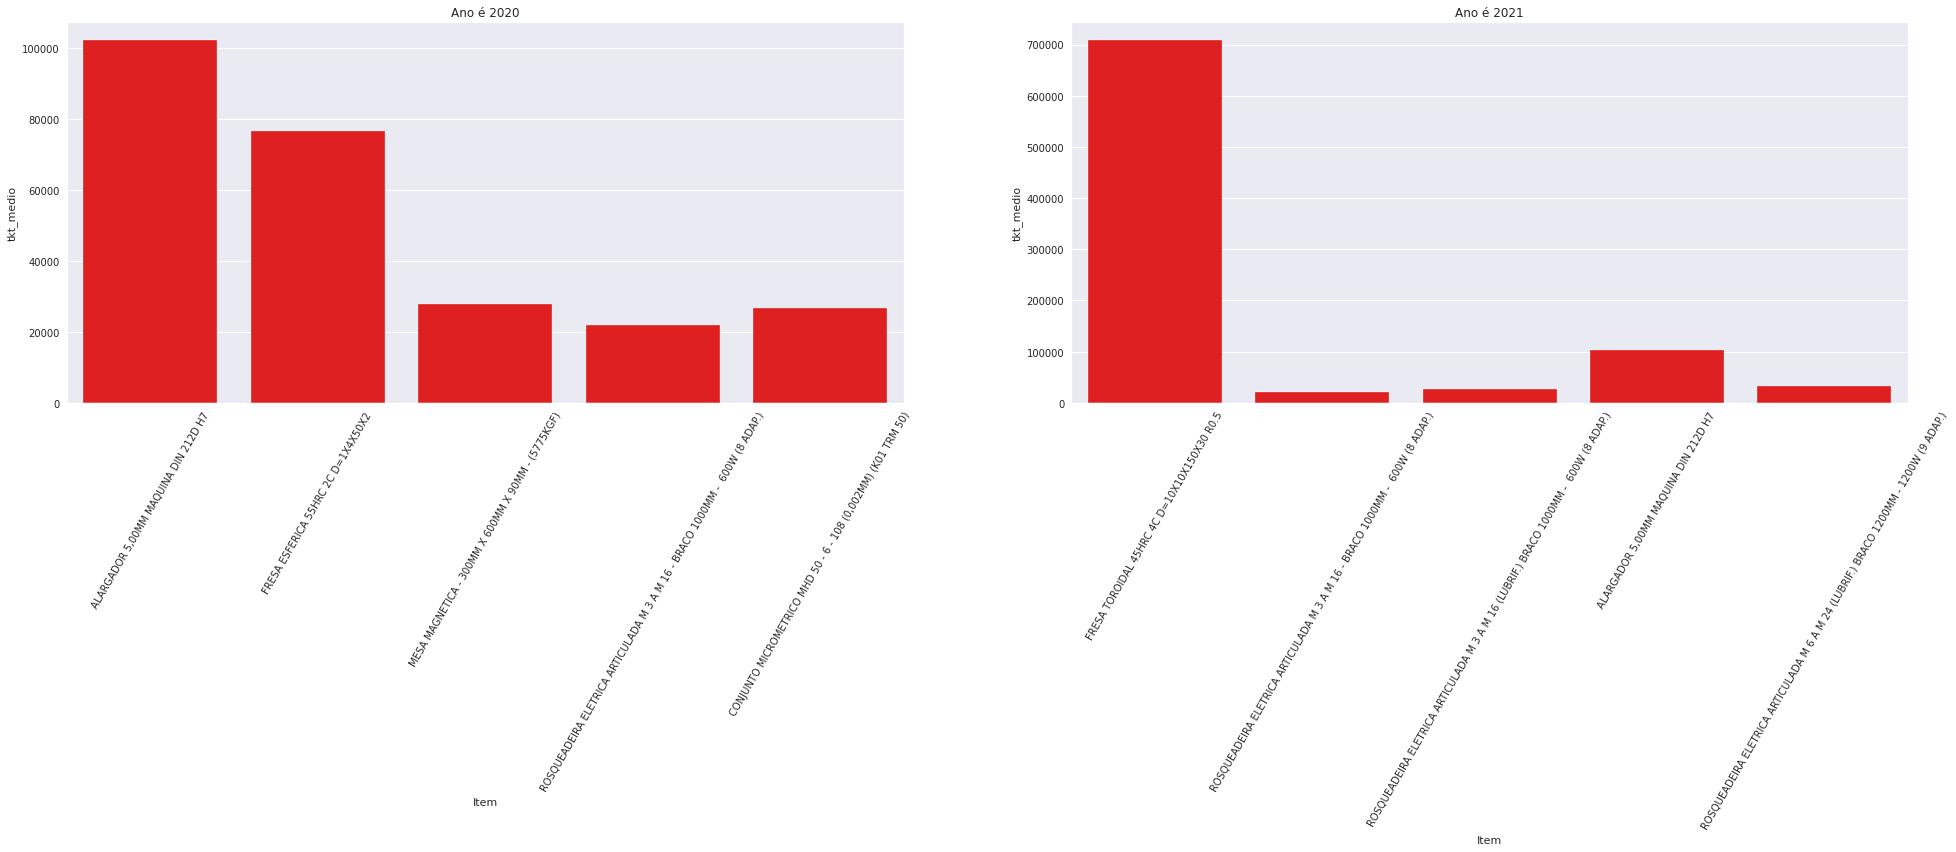

In [105]:
lista_ano = [2020, 2021]
fig, axes = plt.subplots(1, 2, figsize=(33,7))
listinha_aux = [0, 1]
for i, j in zip(lista_ano, listinha_aux):
    x = (df_item_ano.query(f'ano == {i}')).head()
    sns.barplot(ax = axes[j] , x = 'Item', y = 'tkt_medio', data = x, color = 'red')
    axes[j].set_title(f"Ano é {i}")
    axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation = 60)

In [106]:
df_item = (
    df_saida
 .assign(nome_mes = lambda x:x['mes'].apply(nomear_mes))
)

In [107]:
def fazer_grafico(lista_tipo, listinha_aux, dataframe1, dataframe2 ,col_agg1, col_agg2, col_cont1, col_cont2):
    fig, axes = plt.subplots(1, 4, figsize=(25,7))
    for i, j in zip(lista_tipo, listinha_aux):
        x = (dataframe1
             .query(f'ano == 2021 and SubTipo in ("{i}")')
             .groupby(col_agg1)
             .agg(pcs = (f'{col_cont1}','count'))
             .reset_index()
             .sort_values(by = 'mes'))
        y = (dataframe2
             .query(f'ano == 2021 and SubTipo in ("{i}")')
             .groupby(col_agg2)
             .agg(pcs = (f'{col_cont2}','sum'))
             .reset_index()
             .sort_values(by = 'mes'))        

        sns.lineplot(ax = axes[j], x = 'nome_mes', y = 'pcs', data = x, palette = 'red', linewidth = 10, color = 'red')
        sns.lineplot(ax = axes[j], x = 'nome_mes', y = 'pcs', data = y, linewidth = 10, color = 'blue')

        axes[j].set_title(f"O SubTipo é {i}")
        axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation = 60)
        axes[j].legend(['estoque', 'itens'])



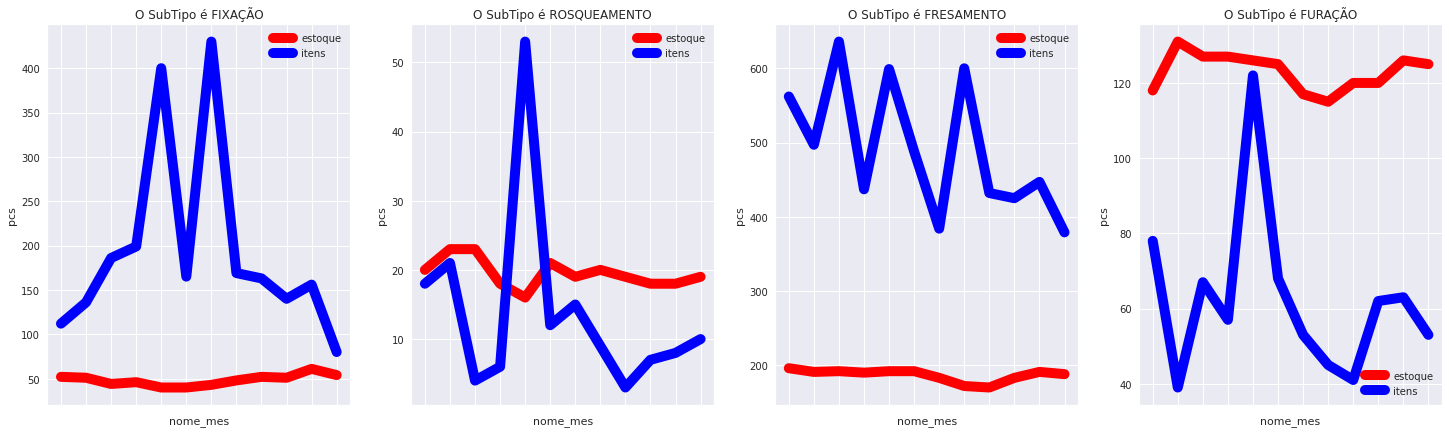

In [108]:
lista_tipo = ["FIXAÇÃO", "ROSQUEAMENTO", "FRESAMENTO", "FURAÇÃO"]
listinha_aux = [0, 1, 2, 3]
col_agg1 = ['SubTipo', 'nome_mes', 'mes']
col_agg2 = ['SubTipo', 'nome_mes', 'mes']
fazer_grafico(lista_tipo = lista_tipo, 
              listinha_aux= listinha_aux, 
              dataframe1 = df_estoque_trat, 
              dataframe2 = df_item,
              col_agg1 = col_agg1, 
              col_agg2 = col_agg2,
              col_cont1 = 'SubTipo', 
              col_cont2 = 'QtdSaida')

In [109]:
((
    df_item
 .query('ano == 2021')
 .groupby('SubTipo')
 .agg(receita = ('ValorSaida','sum'),
      pecas = ('QtdSaida','sum'))
 .reset_index()
 .sort_values(by = 'receita', ascending = False)
 
 
 ).merge((
    df_estoque_trat
 .query('ano == 2021')
 .groupby(['SubTipo'])
 .agg(estoque = ('SubTipo','count'))
 .reset_index()
 
 
 ), how = 'left', on = 'SubTipo')

)


,SubTipo,receita,pecas,estoque
0,FIXAÇÃO,1.308982e+08,2336,582.0
1,FURAÇÃO,4.594555e+07,748,1477.0
2,FRESAMENTO,1.673642e+07,5886,2240.0
3,ROSQUEAMENTO,1.360515e+07,157,234.0
4,TORNEAMENTO,1.085828e+07,10407,1881.0
5,COMPONENTES,3.542115e+06,981,463.0
6,MOLDES E MATRIZES,9.754458e+04,39,117.0
7,FRESAMENTO FLEX,1.633400e+02,220,NaN
8,TORNEAMENTO FLEX,4.564000e+01,20,5.0


# Analyze qualitative variables

In [110]:
df_qualitative = (
    df_saida
    .query('ano == 2021')
    .filter(['SubTipo', 'ValorSaida', 'QtdSaida', 'NFSaida'])
    
)
df_qualitative['cupom'] = df_qualitative.groupby('NFSaida').NFSaida.transform(np.count_nonzero)

df_qualitative = (
df_qualitative
.assign(tkt_medio = lambda x:x['ValorSaida']/x['cupom'])
.assign(ipc = lambda x:x['QtdSaida']/x['cupom']))



In [111]:
df_qualitative.drop(index = df_qualitative[df_qualitative['ValorSaida'] <= 300000 ].index, inplace = True)

In [112]:
df_qualitative.describe()

,ValorSaida,QtdSaida,NFSaida,cupom,tkt_medio,ipc
count,6.900000e+01,69.000000,69.000000,69.000000,6.900000e+01,69.000000
mean,2.896474e+06,1.971014,5362.318841,17.768116,5.588851e+05,0.653153
std,5.164370e+06,2.889998,309.146381,17.955947,9.922425e+05,1.625219
min,3.123120e+05,1.000000,4847.000000,1.000000,8.134296e+03,0.018519
25%,5.706480e+05,1.000000,5125.000000,3.000000,4.338125e+04,0.041667
50%,1.167155e+06,1.000000,5362.000000,10.000000,1.042910e+05,0.142857
75%,2.414526e+06,2.000000,5616.000000,35.000000,4.091541e+05,0.333333
max,3.088838e+07,20.000000,5833.000000,54.000000,5.463765e+06,10.000000


In [113]:
df_qualitative.describe().to_csv('/content/drive/My Drive/TCC_FIA_IA/estatistica_descritiva.csv', sep = ';', decimal = ',')

In [114]:
df_saida.SubTipo.value_counts(normalize = True)

FRESAMENTO           0.341442
TORNEAMENTO          0.167165
FIXAÇÃO              0.161248
FURAÇÃO              0.135788
ROSQUEAMENTO         0.084329
COMPONENTES          0.047155
MOLDES E MATRIZES    0.032214
TORNEAMENTO FLEX     0.015957
FRESAMENTO FLEX      0.011893
TORNEAMENTO VALUE    0.002211
ROTATIVA             0.000359
USINAGEM             0.000239
Name: SubTipo, dtype: float64

In [115]:
df_saida.Cliente.value_counts(normalize = True)

PASSARELLA               0.075126
UFI                      0.035859
MERSEN                   0.035381
FERRAMENTARIA JUNDIAI    0.034066
VISION ONE               0.029943
                           ...   
J.S.ANAYA                0.000060
MAT EQUIPAMENTOS         0.000060
OPUSPAC                  0.000060
ISOLETRI                 0.000060
USIDANI                  0.000060
Name: Cliente, Length: 324, dtype: float64

In [116]:
df_estoque.total.describe()

count    20190.000000
mean       327.865548
std        611.720827
min          0.000000
25%         75.000000
50%        169.665000
75%        378.230000
max      24000.000000
Name: total, dtype: float64

# Conclusion

We can see that we have a very serious problem in planning the stock of the subtypes of the "FIXAÇÃO" AND "FRESAMENTO" parts, there is also a less serious problem in the planning of the subtype parts: "ROSQUEAMENTO" and "FURAÇÃO".